# A walk-through of Uncertainty characterisation (UC) module

The UC module of `PyUncertainNumber` provides supports for approporite representation of uncertain quantities  of interests (QoI) given informtion available from empirical nowledge, theoreotical argument of expert opinion, imperfect data. Users refer to [this link](https://pyuncertainnumber.readthedocs.io/en/latest/guides/uc.html) for a comprehensive guide.

This notebook is written by [Leslie Yu Chen](https://yuchenakaleslie.github.io/) for the [DAWS2 UQ & M workshop](https://sites.google.com/view/uncertaintyquantification/home). 

Personal website: https://yuchenakaleslie.github.io/<br>
ResearchGate: https://www.researchgate.net/profile/Yu-Chen-402<br>
Contact: yu.chen2@liverpool.ac.uk


All rights reserved.

===================

## Table of Contents
#### [1. Direct assumption](#direct_assumption)
#### [2. known constraints](#known_constraint)
#### [3. Composition](#composition)
#### [4. Hedged numerical expression](#hedges)
#### [5. Empirical measurements](#measurements)

# setup

In [1]:
from pyuncertainnumber import UncertainNumber as UN
import pyuncertainnumber as pun
import pyuncertainnumber.pba as pba

In [2]:
from rich import print as rprint
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
%load_ext autoreload
%autoreload 2
%load_ext rich
%matplotlib inline

In [4]:
# set up a global plt style for the script
plt.rcParams.update({
        "font.size": 11,
        "text.usetex": True,
        "font.family": "serif",
        "legend.fontsize": 'small',
        })

***
<a id="direct_assumption"></a>
# 1. Direct assumption

## minimal specification
- which leads to vacuous intervals

In [5]:
# the most extreme case where nothing is inputted
un = UN()
un  # see __repr__

a vacuous interval is created


UncertainNumber(essence='interval', bounds=[-inf, inf], _construct=Interval [-inf, inf], naked_value=nan)

In [6]:
# a minimal case where there are ancillary information
un = UN(
    name='elas_modulus', 
    symbol='E', 
    units='Pa')

a vacuous interval is created


In [7]:
rprint(un)

UncertainNumber(name='elas_modulus', symbol='E', units='Pa', essence='interval', bounds=[-inf, inf], 
_construct=Interval [-inf, inf], naked_value=nan)

## if specify an `interval`

#### a quick way to just get an interval for quick computation

In [8]:
a = pun.I([2,3])
a

UncertainNumber(essence='interval', bounds=Interval [2, 3], _construct=Interval [2, 3], naked_value=2.5)

In [9]:
# see the underlying mathematical construct
a._construct

Interval [2, 3]

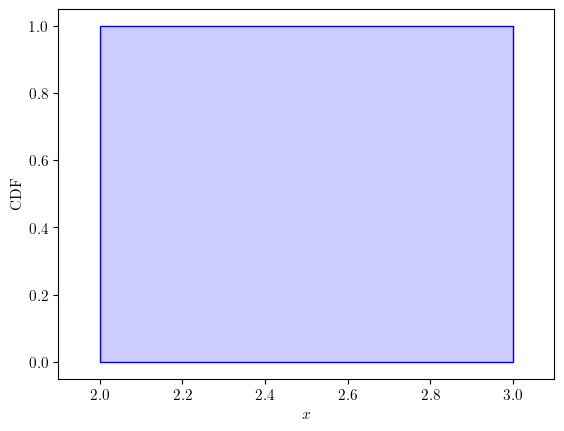

In [10]:
_ = a.display(style='band')

#### a more verbose/informative way

In [11]:
''' Example 1: if it is an interval '''

interval_UN = UN(name='elas_modulus', 
                 symbol='E', 
                 units='Pa', 
                 essence='interval', 
                 bounds=[2,3]
                )

In [12]:
interval_UN

UncertainNumber(name='elas_modulus', symbol='E', units='Pa', essence='interval', bounds=[2, 3], _construct=Interval [2, 3], naked_value=2.5)

#### Example: specific test for parseing string-type of `self.interval_initialisation`

In [13]:
un = UN(name='elas_modulus', 
                   symbol='E', 
                   units='Pa', 
                   essence='interval', 
                   bounds='[3 +- 10%]')

In [14]:
un = UN(name='elas_modulus', 
       symbol='E', 
       units='Pa', 
       essence='interval', 
       bounds='about 3',
       )

In [15]:
un

UncertainNumber(name='elas_modulus', symbol='E', units='Pa', essence='interval', bounds='about 3', _construct=Interval [1, 5], naked_value=3.0)

<Axes: xlabel='$x$', ylabel='CDF'>

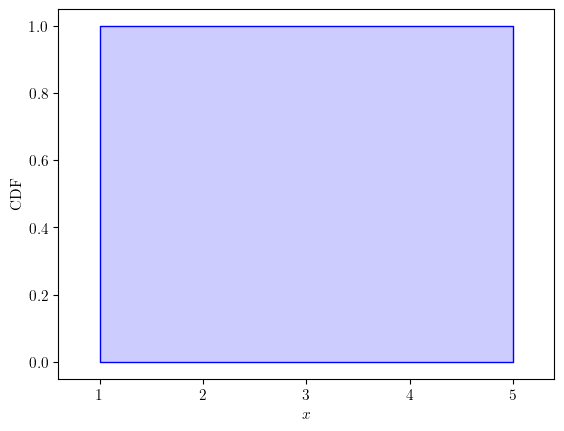

In [16]:
un.display(style='band')

## if specify a `distribution`

- Additional constructors for distribution-type `un` object can be found in this [file](./UN_distribution/UN_distribution_instantiation.ipynb).

In [17]:
d = UN(
    name='elas_modulus', 
    symbol='E', 
    units='Pa', 
    essence='distribution', 
    distribution_parameters=['gaussian', (6, 2)])

In [18]:
d._construct

dist ~ gaussian(6, 2)

In [19]:
d  # __repr__

UncertainNumber(name='elas_modulus', symbol='E', units='Pa', essence='distribution', distribution_parameters=['gaussian', (6, 2)], _construct=dist ~ gaussian(6, 2), naked_value=np.float64(6.0))

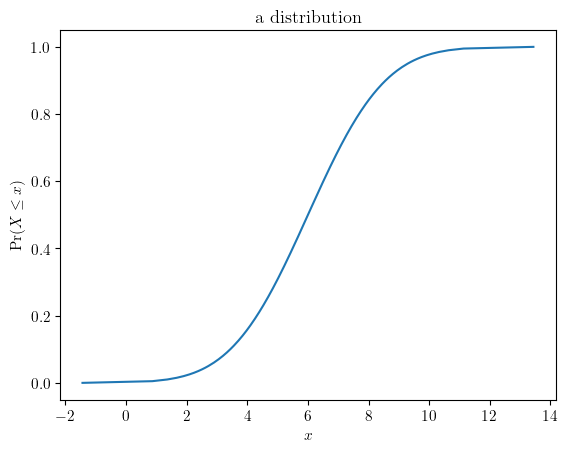

In [20]:
_ = d.display(title='a distribution')

## if specify a `pbox`

You can explicitly call using argument essence='pbox' or implicitly call distribution with interval parameters

In [21]:
p = UN(
    name='elas_modulus', 
    symbol='E', 
    units='Pa', 
    essence='pbox', 
    measurand = "unobservable parameter",
    nature = "expert opinion",
    provenence = "analyst",
    justification = "reference",
    distribution_parameters=['gaussian', ([0,12],[1,4])])

In [22]:
p

UncertainNumber(name='elas_modulus', symbol='E', units='Pa', essence='pbox', distribution_parameters=['gaussian', ([0, 12], [1, 4])], _construct=Pbox: ~ norm(range=['-14.88', '26.88'], mean=[0.0, 12.0], var=[1.0, 92.432]), naked_value=np.float64(6.0), measurand='unobservable parameter', nature='expert opinion', provenence='analyst', justification='reference')

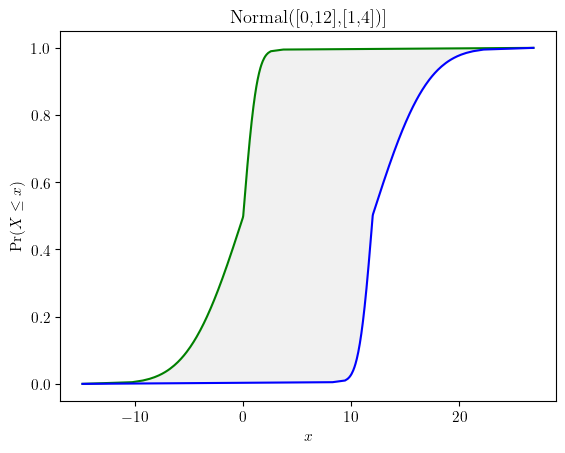

In [23]:
_ = p.display(title="Normal([0,12],[1,4])]")

In [24]:
p_implicit = UN(essence='distribution', 
    distribution_parameters=['gaussian', ([0,12],[1,4])])

***
<a id="known_constraint"></a>
# 2. known constraints

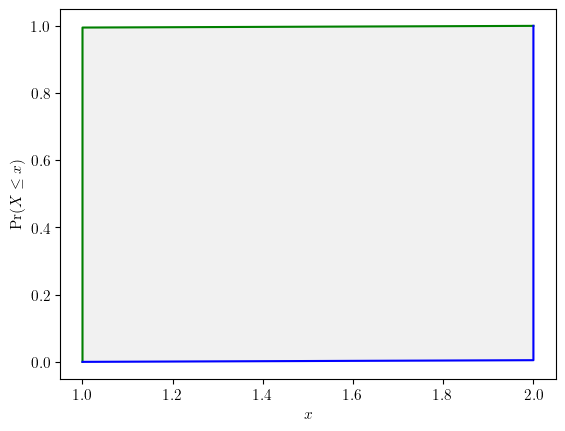

In [25]:
_ = pun.min_max(1,2).display()
# _ = pun.mean_var(0,1).display()
# pun.min_mean(0,1).display()
# pun.min_max_mean(0,2,1).display()
# pun.min_max_mean_var(0, 2, 1, 0.5).display()

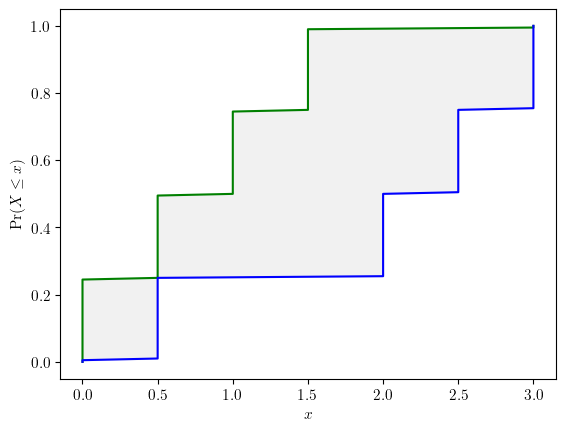

In [26]:
_ = pun.from_percentiles(
    {0: 0,
    0.25: 0.5,
    0.5: pba.I(1,2),
    0.75: pba.I(1.5,2.5),
    1: 3}
).display()

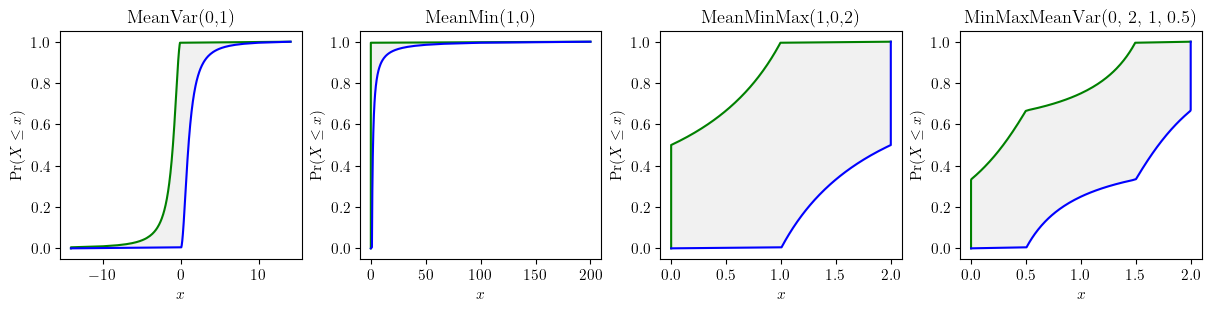

In [27]:
''' all '''
with mpl.rc_context({"text.usetex": True}):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 3), layout="constrained")
    pun.mean_var(0,1).display(style='band', title='MeanVar(0,1)', ax=axes[0])
    pun.min_mean(0, 1).display(style='band', title='MeanMin(1,0)', ax=axes[1])
    pun.min_max_mean(0,2,1).display(style='band', title='MeanMinMax(1,0,2)', ax=axes[2])
    pun.min_max_mean_var(0, 2, 1, 0.5).display(style='band', title='MinMaxMeanVar(0, 2, 1, 0.5)', ax=axes[3])

***
<a id="composition"></a>
# 3. Composition

### from the arithmetic between probability distributions with different `dependency` structures

In [28]:
a = pun.norm(3,1)
# _ = a.display()

In [29]:
b = pun.norm(6, 2)
# _ = b.display()

In [30]:
t = a + b

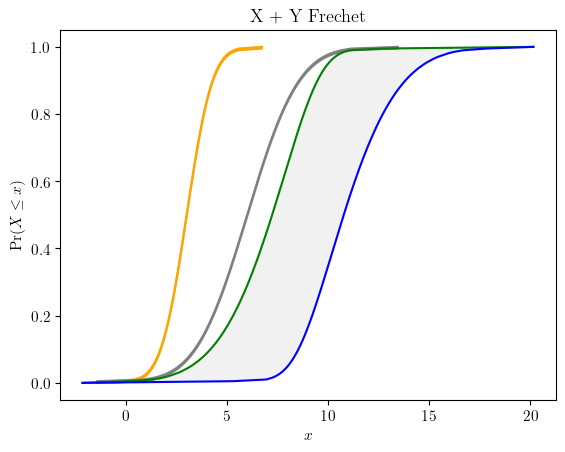

In [31]:
fig, ax = plt.subplots()
a.display(ax=ax, bound_colors=('orange', 'orange'))
b.display(ax=ax, bound_colors=('gray', 'gray'))
_ = t.display(ax=ax, title='X + Y Frechet')

### from the arithmetic of probability distribution and interval objects

- Additional details can be found in p-box arithmetic

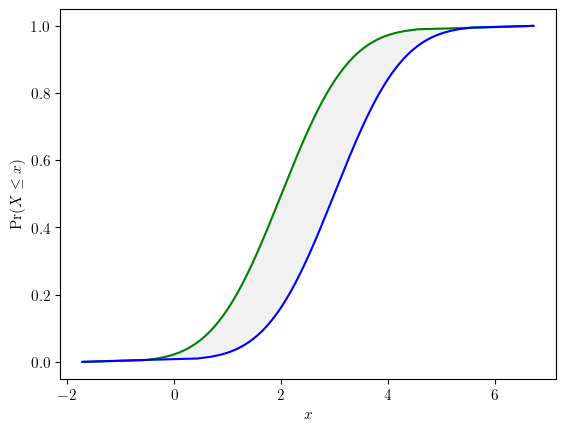

In [32]:
a = pba.norm(0, 1)
b = pba.uniform(2,3)
t = a + b 
_ = t.display()

### from interval-type `expert opinion`

- This is also a case with aggregation from DS structure.

In [33]:
from pyuncertainnumber import stochastic_mixture

In [34]:
lower_endpoints = np.random.uniform(-0.5, 0.5, 7)
upper_endpoints = np.random.uniform(0.5, 1.5, 7)
m_weights = [0.1, 0.1, 0.25, 0.15, 0.1, 0.1, 0.2] 
# a list of nInterval objects
nI = [pba.I(couple) for couple in zip(lower_endpoints, upper_endpoints)]
# nI

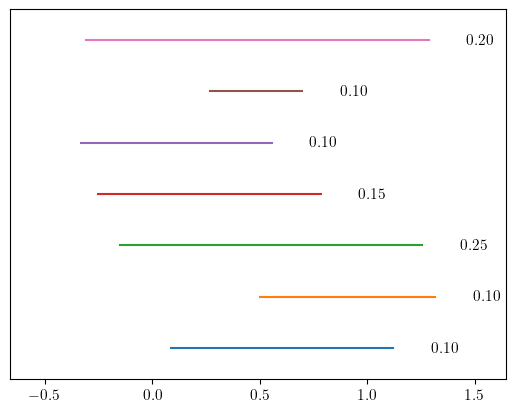

In [35]:
from pyuncertainnumber.pba.ds import plot_DS_structure
with mpl.rc_context({"text.usetex": True}):
    ax = plot_DS_structure(nI, weights=m_weights)

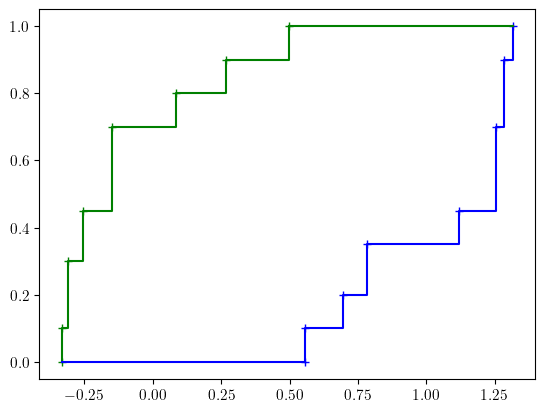

In [36]:
pbox_mix = stochastic_mixture(nI, weights=m_weights, display=True, return_type='pbox')

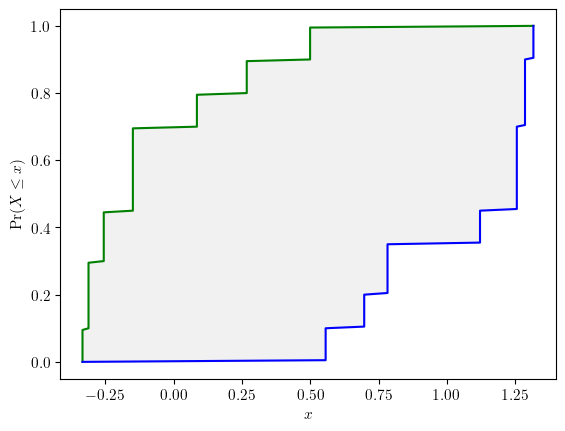

In [37]:
_ = pbox_mix.display()

***
<a id="hedges"></a>
# 4. Hedged numerical expression

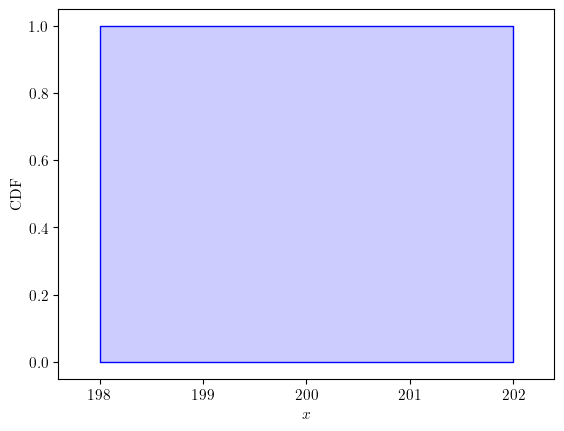

In [38]:
# interval output
_ = pun.hedge_interpret('about 200', return_type='interval').display()

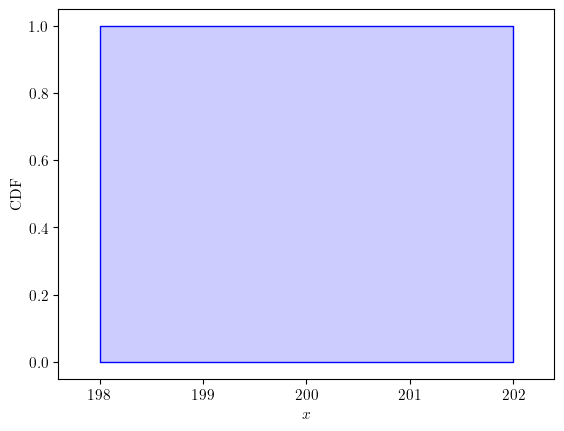

In [39]:
# pbox output
_ = pun.hedge_interpret('about 200', return_type='interval').display()

***
<a id="measurements"></a>
# 5. Empirical measurements

### KS bounds for precise data

- the bounds of a free p-box by KS confidence limits as follows:
- While the Kolmogorov–Smirnov test is usually used to test whether a given $F(x)$ is the underlying probability distribution of $Fn(x)$, the procedure may be inverted to give confidence limits on F(x) itself. If one chooses a critical value of the test statistic Dα such that P(Dn > Dα) = α, then a band of width ±Dα around Fn(x) will entirely contain F(x) with probability 1 − α.

In [40]:
from pyuncertainnumber.pba.intervalOperators import make_vec_interval
from pyuncertainnumber.pba.imprecise import imprecise_ecdf
from pyuncertainnumber.pba.params import Data
from pyuncertainnumber.pba.utils import pl_ecdf_bounding_bundles

Text(0.5, 1.0, 'KS confidence limits for precise data')

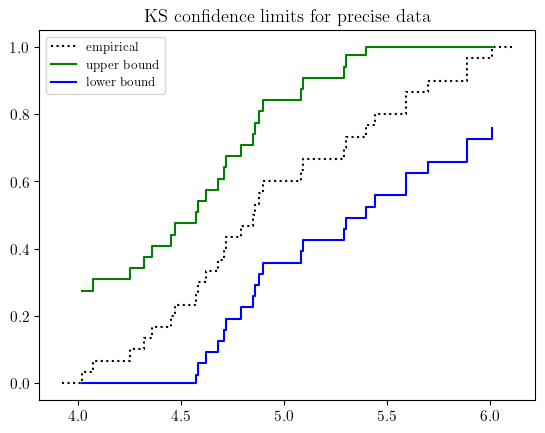

In [41]:
# precise data

_, _= pun.KS_bounds(Data.sudret, alpha=0.025,  display=True)
plt.title('KS confidence limits for precise data')

In [42]:
# imprecise data

# v_skinny = intervalise(Data.skinny)
v_skinny = make_vec_interval(Data.skinny)

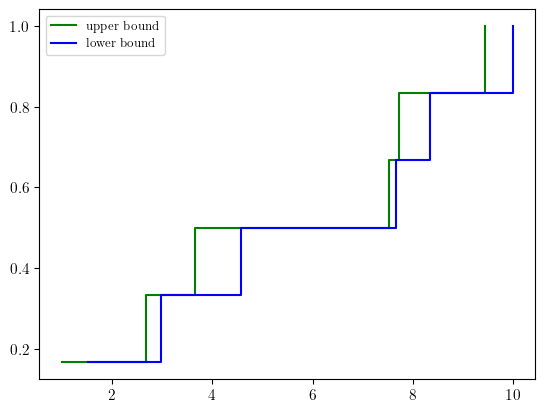

In [43]:
l, r= imprecise_ecdf(v_skinny)
pl_ecdf_bounding_bundles(l, r)

Text(0.5, 1.0, 'KS confidence limits for imprecise data (skinny data)')

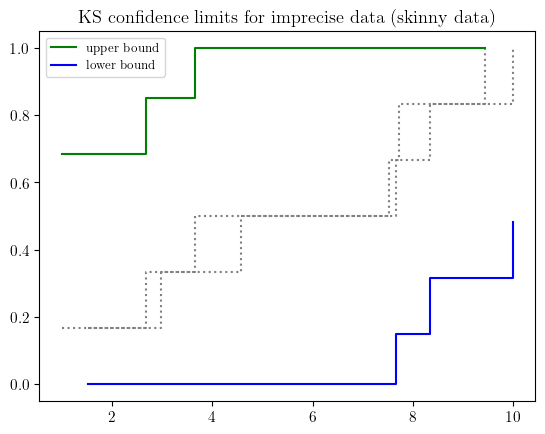

In [44]:
# import scipy.stats as sps
# l_sps = sps.ecdf(v_skinny.lo)
l1, r1 = pun.KS_bounds(v_skinny, alpha=0.025,  display=True)
# plt.xlim([0, 20])
plt.title('KS confidence limits for imprecise data (skinny data)')

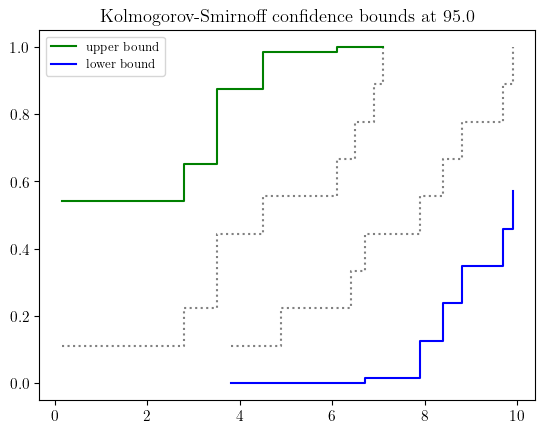

In [45]:
v_puffy = make_vec_interval(Data.puffy)
l2, r2 = pun.KS_bounds(v_puffy, alpha=0.025,  display=True)